<a href="https://colab.research.google.com/github/gdivya17/EEG/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir(r'/content/drive/My Drive/Colab Notebooks')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

file_x = 'data/32/features_raw.dat'
file_y = 'data/divya/threshold/label_class_0_3.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

In [0]:
grp=[]
for i in range(1,33):
  for j in range(40):
    grp.append(i)

In [0]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from numpy import sort
from sklearn.svm import SVC

In [96]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction=[]
actual=[]
results=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results.append(accuracy*100.0)
      prediction.append(predictions)
      actual.append(y_test)   
      count+=1

1
Thresh=0.007, n=5, Accuracy: 60.00%
2
Thresh=0.007, n=5, Accuracy: 75.00%
3
Thresh=0.007, n=5, Accuracy: 92.50%
4
Thresh=0.007, n=5, Accuracy: 47.50%
5
Thresh=0.007, n=5, Accuracy: 80.00%
6
Thresh=0.007, n=5, Accuracy: 92.50%
7
Thresh=0.007, n=5, Accuracy: 77.50%
8
Thresh=0.007, n=5, Accuracy: 87.50%
9
Thresh=0.008, n=5, Accuracy: 77.50%
10
Thresh=0.007, n=5, Accuracy: 75.00%
11
Thresh=0.006, n=5, Accuracy: 80.00%
12
Thresh=0.007, n=5, Accuracy: 62.50%
13
Thresh=0.007, n=5, Accuracy: 70.00%
14
Thresh=0.006, n=5, Accuracy: 60.00%
15
Thresh=0.007, n=5, Accuracy: 75.00%
16
Thresh=0.007, n=5, Accuracy: 67.50%
17
Thresh=0.007, n=5, Accuracy: 90.00%
18
Thresh=0.007, n=5, Accuracy: 95.00%
19
Thresh=0.008, n=5, Accuracy: 72.50%
20
Thresh=0.007, n=5, Accuracy: 82.50%
21
Thresh=0.007, n=5, Accuracy: 80.00%
22
Thresh=0.007, n=5, Accuracy: 62.50%
23
Thresh=0.007, n=5, Accuracy: 92.50%
24
Thresh=0.007, n=5, Accuracy: 70.00%
25
Thresh=0.007, n=5, Accuracy: 62.50%
26
Thresh=0.007, n=5, Accuracy: 70

In [97]:
prediction=np.concatenate(prediction).ravel().tolist()
actual=np.concatenate(actual).ravel().tolist()
print(confusion_matrix(actual, prediction)) 
print("mean= ",np.mean(results))
print("standard deviation= ",np.std(results))  
print("ACCURACY=", accuracy_score(actual, prediction)*100) 

[[  5 292]
 [ 10 973]]
mean=  76.40625
standard deviation=  11.658176784450474
ACCURACY= 76.40625


In [0]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

file_x = 'data/32/features_raw.dat'
file_y = 'data/divya/threshold/label_class_1_3.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

In [11]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction1=[]
actual1=[]
results1=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results1.append(accuracy*100.0)
      prediction1.append(predictions)
      actual1.append(y_test)   
      count+=1

1
Thresh=0.007, n=5, Accuracy: 72.50%
2
Thresh=0.006, n=5, Accuracy: 67.50%
3
Thresh=0.006, n=5, Accuracy: 50.00%
4
Thresh=0.006, n=5, Accuracy: 57.50%
5
Thresh=0.006, n=5, Accuracy: 82.50%
6
Thresh=0.007, n=5, Accuracy: 77.50%
7
Thresh=0.007, n=5, Accuracy: 75.00%
8
Thresh=0.006, n=5, Accuracy: 90.00%
9
Thresh=0.006, n=5, Accuracy: 100.00%
10
Thresh=0.006, n=5, Accuracy: 77.50%
11
Thresh=0.008, n=5, Accuracy: 52.50%
12
Thresh=0.006, n=5, Accuracy: 87.50%
13
Thresh=0.007, n=5, Accuracy: 92.50%
14
Thresh=0.006, n=5, Accuracy: 72.50%
15
Thresh=0.007, n=5, Accuracy: 80.00%
16
Thresh=0.006, n=5, Accuracy: 75.00%
17
Thresh=0.007, n=5, Accuracy: 82.50%
18
Thresh=0.007, n=5, Accuracy: 92.50%
19
Thresh=0.007, n=5, Accuracy: 82.50%
20
Thresh=0.007, n=5, Accuracy: 90.00%
21
Thresh=0.006, n=5, Accuracy: 90.00%
22
Thresh=0.007, n=5, Accuracy: 80.00%
23
Thresh=0.006, n=5, Accuracy: 42.50%
24
Thresh=0.007, n=5, Accuracy: 85.00%
25
Thresh=0.007, n=5, Accuracy: 80.00%
26
Thresh=0.007, n=5, Accuracy: 5

In [12]:
prediction1=np.concatenate(prediction1).ravel().tolist()
actual1=np.concatenate(actual1).ravel().tolist()
print(confusion_matrix(actual1, prediction1)) 
print("mean= ",np.mean(results1))
print("standard deviation= ",np.std(results1))  
print("ACCURACY=", accuracy_score(actual1, prediction1)*100) 

[[  3 301]
 [  7 969]]
mean=  75.9375
standard deviation=  13.901860262209516
ACCURACY= 75.9375


In [0]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

file_x = 'data/32/features_raw.dat'
file_y = 'data/divya/threshold/label_class_2_3.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

In [14]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction2=[]
actual2=[]
results2=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results2.append(accuracy*100.0)
      prediction2.append(predictions)
      actual2.append(y_test)   
      count+=1

1
Thresh=0.009, n=5, Accuracy: 75.00%
2
Thresh=0.009, n=5, Accuracy: 75.00%
3
Thresh=0.008, n=5, Accuracy: 80.00%
4
Thresh=0.010, n=5, Accuracy: 55.00%
5
Thresh=0.009, n=5, Accuracy: 60.00%
6
Thresh=0.009, n=5, Accuracy: 82.50%
7
Thresh=0.008, n=5, Accuracy: 60.00%
8
Thresh=0.008, n=5, Accuracy: 77.50%
9
Thresh=0.009, n=5, Accuracy: 77.50%
10
Thresh=0.009, n=5, Accuracy: 85.00%
11
Thresh=0.009, n=5, Accuracy: 82.50%
12
Thresh=0.008, n=5, Accuracy: 57.50%
13
Thresh=0.009, n=5, Accuracy: 62.50%
14
Thresh=0.009, n=5, Accuracy: 72.50%
15
Thresh=0.008, n=5, Accuracy: 70.00%
16
Thresh=0.008, n=5, Accuracy: 65.00%
17
Thresh=0.007, n=5, Accuracy: 100.00%
18
Thresh=0.009, n=5, Accuracy: 97.50%
19
Thresh=0.008, n=5, Accuracy: 77.50%
20
Thresh=0.008, n=5, Accuracy: 75.00%
21
Thresh=0.008, n=5, Accuracy: 80.00%
22
Thresh=0.008, n=5, Accuracy: 85.00%
23
Thresh=0.008, n=5, Accuracy: 97.50%
24
Thresh=0.009, n=5, Accuracy: 82.50%
25
Thresh=0.007, n=5, Accuracy: 97.50%
26
Thresh=0.008, n=5, Accuracy: 8

In [15]:
prediction2=np.concatenate(prediction2).ravel().tolist()
actual2=np.concatenate(actual2).ravel().tolist()
print(confusion_matrix(actual2, prediction2)) 
print("mean= ",np.mean(results2))
print("standard deviation= ",np.std(results2))  
print("ACCURACY=", accuracy_score(actual2, prediction2)*100) 

[[   0  279]
 [   0 1001]]
mean=  78.203125
standard deviation=  13.128487259938785
ACCURACY= 78.203125


In [0]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

file_x = 'data/32/features_raw.dat'
file_y = 'data/divya/threshold/label_class_3_3.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

In [17]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction3=[]
actual3=[]
results3=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results3.append(accuracy*100.0)
      prediction3.append(predictions)
      actual3.append(y_test)   
      count+=1

1
Thresh=0.007, n=5, Accuracy: 100.00%
2
Thresh=0.008, n=5, Accuracy: 70.00%
3
Thresh=0.007, n=5, Accuracy: 97.50%
4
Thresh=0.007, n=5, Accuracy: 67.50%
5
Thresh=0.007, n=5, Accuracy: 85.00%
6
Thresh=0.007, n=5, Accuracy: 85.00%
7
Thresh=0.007, n=5, Accuracy: 92.50%
8
Thresh=0.007, n=5, Accuracy: 90.00%
9
Thresh=0.007, n=5, Accuracy: 100.00%
10
Thresh=0.007, n=5, Accuracy: 87.50%
11
Thresh=0.007, n=5, Accuracy: 55.00%
12
Thresh=0.007, n=5, Accuracy: 65.00%
13
Thresh=0.008, n=5, Accuracy: 80.00%
14
Thresh=0.007, n=5, Accuracy: 80.00%
15
Thresh=0.007, n=5, Accuracy: 75.00%
16
Thresh=0.007, n=5, Accuracy: 57.50%
17
Thresh=0.007, n=5, Accuracy: 80.00%
18
Thresh=0.007, n=5, Accuracy: 92.50%
19
Thresh=0.007, n=5, Accuracy: 77.50%
20
Thresh=0.008, n=5, Accuracy: 82.50%
21
Thresh=0.007, n=5, Accuracy: 72.50%
22
Thresh=0.006, n=5, Accuracy: 62.50%
23
Thresh=0.007, n=5, Accuracy: 60.00%
24
Thresh=0.006, n=5, Accuracy: 82.50%
25
Thresh=0.007, n=5, Accuracy: 67.50%
26
Thresh=0.007, n=5, Accuracy: 

In [18]:
prediction3=np.concatenate(prediction3).ravel().tolist()
actual3=np.concatenate(actual3).ravel().tolist()
print(confusion_matrix(actual3, prediction3)) 
print("mean= ",np.mean(results3))
print("standard deviation= ",np.std(results3))  
print("ACCURACY=", accuracy_score(actual3, prediction3)*100) 

[[  3 285]
 [  6 986]]
mean=  77.265625
standard deviation=  12.442985206909755
ACCURACY= 77.265625


In [0]:
results_final=[0]*32
for i in range(32):
  results_final[i]=(results[i]+results1[i]+results2[i]+results3[i])/4


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

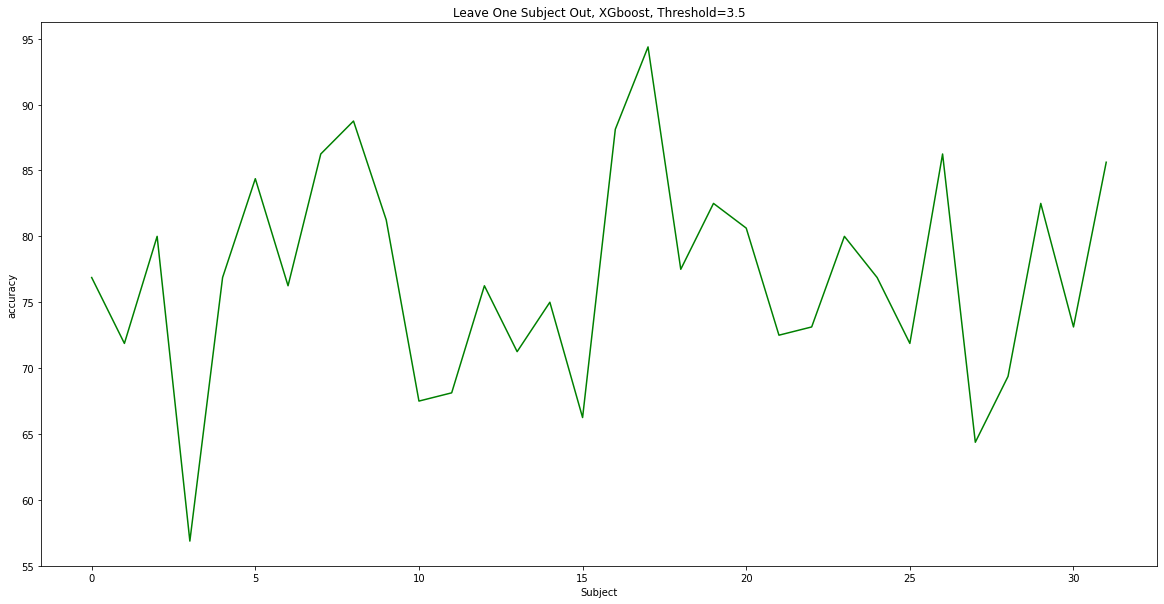

In [90]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(32)], results_final, color='g')
plt.xlabel('Subject')
plt.ylabel('accuracy')
plt.title('Leave One Subject Out, XGboost, Threshold=3.5')
plt.show()

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
from collections import defaultdict

In [0]:
models = []
models.append(('SVC-rbf', SVC(kernel = 'rbf', random_state = 5)))
models.append(('SVC-poly', SVC(kernel = 'poly', random_state = 10)))
models.append(('SVC-sigmoid', SVC(kernel = 'sigmoid',  random_state = 10)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
models.append(('NaiveBayes', GaussianNB()))
models.append(('NN', MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=0)))

scoring = 'accuracy'

results_1_0 = defaultdict(list)

In [47]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
thresh_values=[3.5,4,4.5,5,5.5,6,6.5,7]
for thresh_val in thresh_values:
      print('thresh_value:'+str(thresh_val))
      # Get Data
      
      file_y = "data/divya/threshold/label_class_0_{}.dat".format(str(thresh_val))
      y = np.genfromtxt(file_y, delimiter=' ')
      
      # Split the data into training/testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
      
      # Feature Scaling
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      from sklearn.decomposition import PCA
      pca = PCA(n_components=50)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.fit_transform(X_test)
                        
      print('Model | Mean of CV | Std. Dev. of CV | Time')
      for i in range(len(models)):
                name, model=models[i]
                start_time = time.time()
                kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
                cv_results = model_selection.cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
                t = (time.time() - start_time)
                results_1_0[i].append(cv_results.mean())
                msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                print(msg) 

thresh_value:3.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC: 0.771130 (0.047265) 0.289702 s
SVC: 0.768889 (0.048792) 0.151066 s
SVC: 0.765562 (0.043674) 0.204683 s
KNN: 0.771130 (0.047265) 0.110110 s
NaiveBayes: 0.754407 (0.043095) 0.009637 s
NN: 0.285816 (0.046949) 0.102774 s
thresh_value:4
Model | Mean of CV | Std. Dev. of CV | Time
SVC: 0.715345 (0.043864) 0.309626 s
SVC: 0.714221 (0.043524) 0.174413 s
SVC: 0.703091 (0.034040) 0.238865 s
KNN: 0.708647 (0.044218) 0.115302 s
NaiveBayes: 0.703085 (0.038226) 0.010212 s
NN: 0.339373 (0.043851) 0.113838 s
thresh_value:4.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC: 0.630515 (0.050787) 0.341724 s
SVC: 0.628281 (0.046195) 0.196491 s
SVC: 0.614922 (0.041631) 0.286257 s
KNN: 0.619385 (0.048609) 0.108063 s
NaiveBayes: 0.623855 (0.038412) 0.009482 s
NN: 0.404103 (0.055421) 0.102759 s
thresh_value:5
Model | Mean of CV | Std. Dev. of CV | Time
SVC: 0.550199 (0.033559) 0.355858 s
SVC: 0.553520 (0.036423) 0.216202 s
SVC: 0.539032 (0.03270

In [0]:
models = []
models.append(('SVC-rbf', SVC(kernel = 'rbf', random_state = 5)))
models.append(('SVC-poly', SVC(kernel = 'poly', random_state = 10)))
models.append(('SVC-sigmoid', SVC(kernel = 'sigmoid',  random_state = 10)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=30)))
models.append(('NaiveBayes', GaussianNB()))
models.append(('NN', MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=0)))

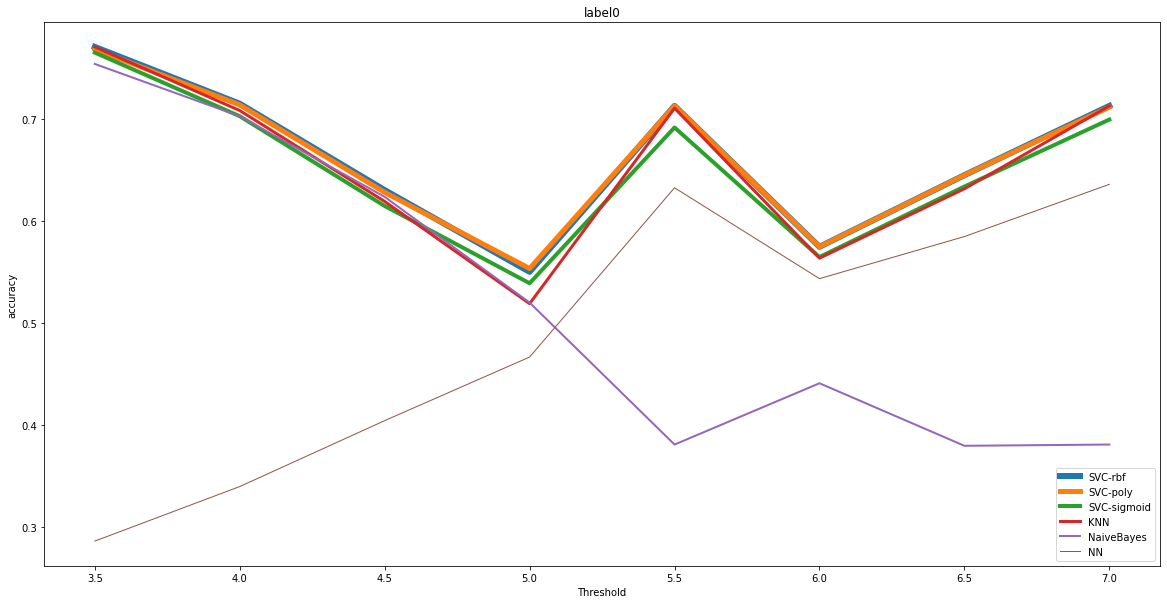

In [79]:
plt.figure(figsize=(20,10))
for i in range(6):
  plt.plot(thresh_values, results_1_0[i],label=models[i][0],linewidth=6-i)
plt.xlabel('Threshold')
plt.ylabel('accuracy')
plt.title('label0')
plt.legend()
plt.show()

In [0]:
results_1_1 = defaultdict(list)
results_1_2 = defaultdict(list)
results_1_3 = defaultdict(list)

In [81]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
thresh_values=[3.5,4,4.5,5,5.5,6,6.5,7]
for thresh_val in thresh_values:
      print('thresh_value:'+str(thresh_val))
      # Get Data
      
      file_y = "data/divya/threshold/label_class_1_{}.dat".format(str(thresh_val))
      y = np.genfromtxt(file_y, delimiter=' ')
      
      # Split the data into training/testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
      
      # Feature Scaling
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      from sklearn.decomposition import PCA
      pca = PCA(n_components=50)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.fit_transform(X_test)
                        
      print('Model | Mean of CV | Std. Dev. of CV | Time')
      for i in range(len(models)):
                name, model=models[i]
                start_time = time.time()
                kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
                cv_results = model_selection.cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
                t = (time.time() - start_time)
                results_1_1[i].append(cv_results.mean())
                msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                print(msg) 

thresh_value:3.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.762266 (0.020899) 0.326718 s
SVC-poly: 0.762266 (0.020293) 0.155367 s
SVC-sigmoid: 0.749988 (0.017256) 0.225001 s
KNN: 0.762266 (0.020899) 0.105540 s
NaiveBayes: 0.492452 (0.221900) 0.009514 s
NN: 0.287952 (0.042517) 0.102774 s
thresh_value:4
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.699777 (0.019791) 0.354645 s
SVC-poly: 0.697542 (0.017841) 0.181316 s
SVC-sigmoid: 0.694202 (0.020317) 0.260268 s
KNN: 0.681912 (0.024313) 0.106179 s
NaiveBayes: 0.354941 (0.027174) 0.009112 s
NN: 0.354947 (0.030280) 0.183842 s
thresh_value:4.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.640633 (0.016598) 0.373874 s
SVC-poly: 0.639516 (0.014628) 0.195604 s
SVC-sigmoid: 0.627213 (0.021331) 0.278396 s
KNN: 0.608250 (0.027803) 0.106892 s
NaiveBayes: 0.406269 (0.024106) 0.009493 s
NN: 0.385028 (0.029533) 0.099367 s
thresh_value:5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.578125 (0.023570) 0.360560 s
SVC

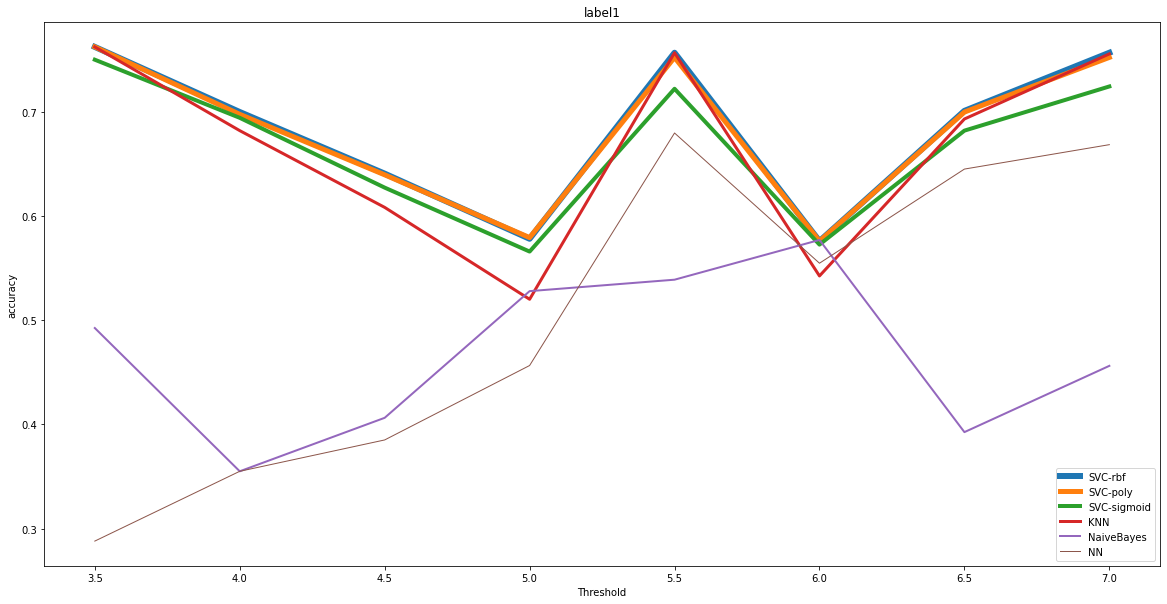

In [82]:
plt.figure(figsize=(20,10))
for i in range(6):
  plt.plot(thresh_values, results_1_1[i],label=models[i][0],linewidth=6-i)
plt.xlabel('Threshold')
plt.ylabel('accuracy')
plt.title('label1')
plt.legend()
plt.show()

In [83]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
thresh_values=[3.5,4,4.5,5,5.5,6,6.5,7]
for thresh_val in thresh_values:
      print('thresh_value:'+str(thresh_val))
      # Get Data
      
      file_y = "data/divya/threshold/label_class_2_{}.dat".format(str(thresh_val))
      y = np.genfromtxt(file_y, delimiter=' ')
      
      # Split the data into training/testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
      
      # Feature Scaling
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      from sklearn.decomposition import PCA
      pca = PCA(n_components=50)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.fit_transform(X_test)
                        
      print('Model | Mean of CV | Std. Dev. of CV | Time')
      for i in range(len(models)):
                name, model=models[i]
                start_time = time.time()
                kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
                cv_results = model_selection.cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
                t = (time.time() - start_time)
                results_1_2[i].append(cv_results.mean())
                msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                print(msg) 

thresh_value:3.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.778994 (0.014711) 0.288651 s
SVC-poly: 0.776760 (0.016120) 0.153957 s
SVC-sigmoid: 0.749994 (0.012552) 0.213199 s
KNN: 0.778994 (0.014711) 0.104105 s
NaiveBayes: 0.271217 (0.011743) 0.009693 s
NN: 0.291372 (0.039995) 0.098286 s
thresh_value:4
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.720931 (0.027114) 0.317709 s
SVC-poly: 0.719814 (0.026520) 0.169833 s
SVC-sigmoid: 0.707536 (0.025153) 0.244103 s
KNN: 0.719814 (0.027445) 0.105901 s
NaiveBayes: 0.313650 (0.016155) 0.009543 s
NN: 0.318163 (0.046366) 0.097315 s
thresh_value:4.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.655059 (0.036499) 0.336458 s
SVC-poly: 0.652824 (0.037195) 0.188433 s
SVC-sigmoid: 0.642787 (0.033756) 0.268071 s
KNN: 0.653948 (0.034825) 0.109501 s
NaiveBayes: 0.363898 (0.031265) 0.009964 s
NN: 0.377343 (0.055588) 0.101991 s
thresh_value:5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.598150 (0.033611) 0.347637 s
SVC

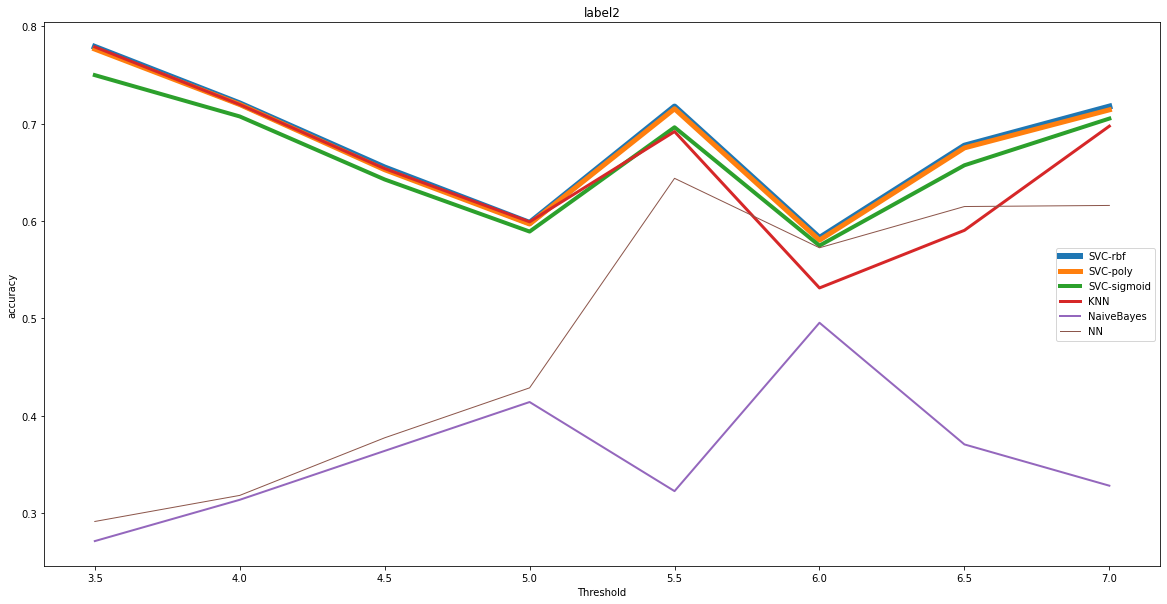

In [85]:
plt.figure(figsize=(20,10))
for i in range(6):
  plt.plot(thresh_values, results_1_2[i],label=models[i][0],linewidth=6-i)
plt.xlabel('Threshold')
plt.ylabel('accuracy')
plt.title('label2')
plt.legend()
plt.show()

In [86]:
file_x = 'data/32/features_raw.dat'
X = np.genfromtxt(file_x, delimiter=' ')
thresh_values=[3.5,4,4.5,5,5.5,6,6.5,7]
for thresh_val in thresh_values:
      print('thresh_value:'+str(thresh_val))
      # Get Data
      
      file_y = "data/divya/threshold/label_class_3_{}.dat".format(str(thresh_val))
      y = np.genfromtxt(file_y, delimiter=' ')
      
      # Split the data into training/testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
      
      # Feature Scaling
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      from sklearn.decomposition import PCA
      pca = PCA(n_components=50)
      X_train_pca = pca.fit_transform(X_train)
      X_test_pca = pca.fit_transform(X_test)
                        
      print('Model | Mean of CV | Std. Dev. of CV | Time')
      for i in range(len(models)):
                name, model=models[i]
                start_time = time.time()
                kfold = model_selection.KFold(n_splits=5, shuffle=True,random_state=0)
                cv_results = model_selection.cross_val_score(model, X_train_pca, y_train, cv=kfold, scoring=scoring)
                t = (time.time() - start_time)
                results_1_3[i].append(cv_results.mean())
                msg = "%s: %f (%f) %f s" % (name, cv_results.mean(), cv_results.std(), t)
                print(msg) 

thresh_value:3.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.781217 (0.018828) 0.272476 s
SVC-poly: 0.780099 (0.020184) 0.144114 s
SVC-sigmoid: 0.771173 (0.016198) 0.190029 s
KNN: 0.781217 (0.018828) 0.104580 s
NaiveBayes: 0.756673 (0.011405) 0.008916 s
NN: 0.324848 (0.035040) 0.097792 s
thresh_value:4
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.745481 (0.027228) 0.295964 s
SVC-poly: 0.744364 (0.027420) 0.158619 s
SVC-sigmoid: 0.737685 (0.023540) 0.227928 s
KNN: 0.745475 (0.030092) 0.114044 s
NaiveBayes: 0.718721 (0.019272) 0.010251 s
NN: 0.327114 (0.049149) 0.103512 s
thresh_value:4.5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.705282 (0.033725) 0.303870 s
SVC-poly: 0.706400 (0.033006) 0.171554 s
SVC-sigmoid: 0.693017 (0.029882) 0.236497 s
KNN: 0.704165 (0.034393) 0.103892 s
NaiveBayes: 0.680751 (0.024647) 0.009321 s
NN: 0.390732 (0.050222) 0.096850 s
thresh_value:5
Model | Mean of CV | Std. Dev. of CV | Time
SVC-rbf: 0.670677 (0.037284) 0.317472 s
SVC

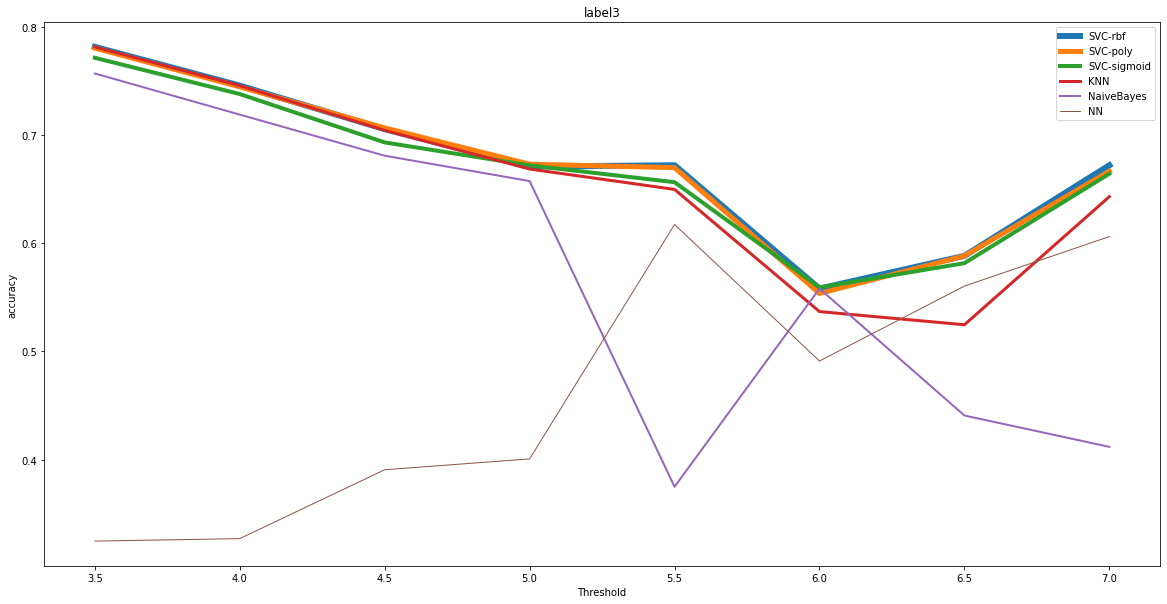

In [87]:
plt.figure(figsize=(20,10))
for i in range(6):
  plt.plot(thresh_values, results_1_3[i],label=models[i][0],linewidth=6-i)
plt.xlabel('Threshold')
plt.ylabel('accuracy')
plt.title('label3')
plt.legend()
plt.show()

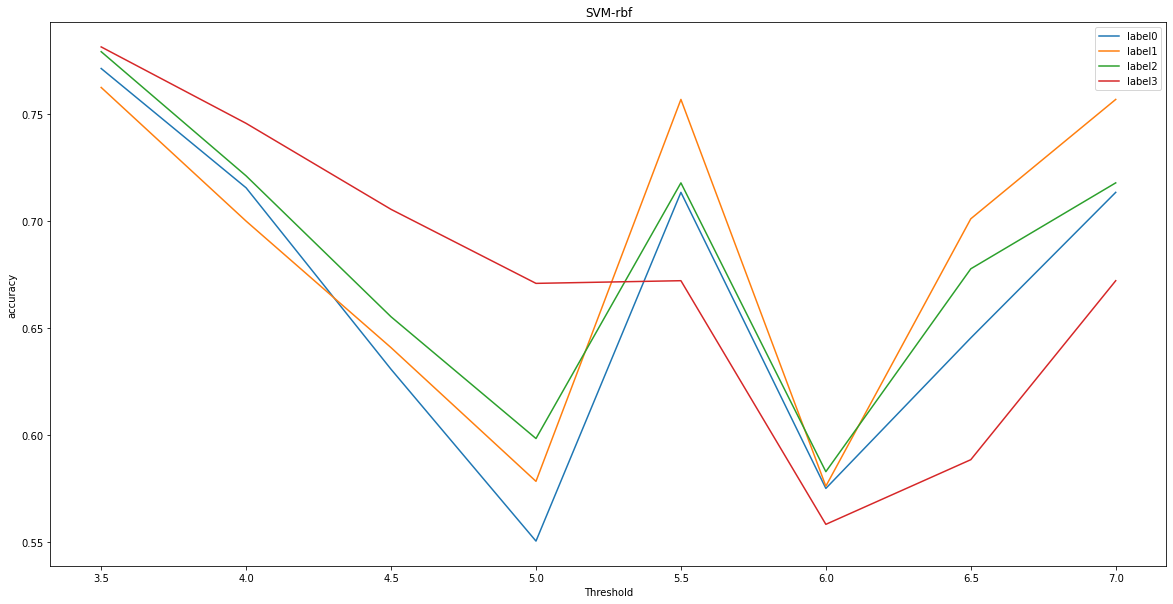

In [88]:
plt.figure(figsize=(20,10))
plt.plot(thresh_values, results_1_0[0],label='label0')
plt.plot(thresh_values, results_1_1[0],label='label1')
plt.plot(thresh_values, results_1_2[0],label='label2')
plt.plot(thresh_values, results_1_3[0],label='label3')

plt.xlabel('Threshold')
plt.ylabel('accuracy')
plt.title('SVM-rbf')
plt.legend()
plt.show()

In [99]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

grp=[]
for i in range(1,33):
  for j in range(40):
    grp.append(i)

file_x = 'data/32/features_raw.dat'
file_y = 'data/divya/threshold/label_class_0_5.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction=[]
actual=[]
results=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results.append(accuracy*100.0)
      prediction.append(predictions)
      actual.append(y_test)   
      count+=1
	  
	  
prediction=np.concatenate(prediction).ravel().tolist()
actual=np.concatenate(actual).ravel().tolist()
print(confusion_matrix(actual, prediction)) 
print("mean= ",np.mean(results))
print("standard deviation= ",np.std(results))  
print("ACCURACY=", accuracy_score(actual, prediction)*100) 


file_x = 'data/32/features_raw.dat'
file_y = 'data/divya/threshold/label_class_1_5.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction1=[]
actual1=[]
results1=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results1.append(accuracy*100.0)
      prediction1.append(predictions)
      actual1.append(y_test)   
      count+=1
	  
prediction1=np.concatenate(prediction1).ravel().tolist()
actual1=np.concatenate(actual1).ravel().tolist()
print(confusion_matrix(actual1, prediction1)) 
print("mean= ",np.mean(results1))
print("standard deviation= ",np.std(results1))  
print("ACCURACY=", accuracy_score(actual1, prediction1)*100) 

file_x = 'data/32/features_raw.dat'
file_y = 'data/divya/threshold/label_class_2_5.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction2=[]
actual2=[]
results2=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results2.append(accuracy*100.0)
      prediction2.append(predictions)
      actual2.append(y_test)   
      count+=1
	  
prediction2=np.concatenate(prediction2).ravel().tolist()
actual2=np.concatenate(actual2).ravel().tolist()
print(confusion_matrix(actual2, prediction2)) 
print("mean= ",np.mean(results2))
print("standard deviation= ",np.std(results2))  
print("ACCURACY=", accuracy_score(actual2, prediction2)*100) 


file_x = 'data/32/features_raw.dat'
file_y = 'data/divya/threshold/label_class_3_5.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')


def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction3=[]
actual3=[]
results3=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results3.append(accuracy*100.0)
      prediction3.append(predictions)
      actual3.append(y_test)   
      count+=1
	  
	  
prediction3=np.concatenate(prediction3).ravel().tolist()
actual3=np.concatenate(actual3).ravel().tolist()
print(confusion_matrix(actual3, prediction3)) 
print("mean= ",np.mean(results3))
print("standard deviation= ",np.std(results3))  
print("ACCURACY=", accuracy_score(actual3, prediction3)*100) 



1
Thresh=0.007, n=5, Accuracy: 60.00%
2
Thresh=0.007, n=5, Accuracy: 60.00%
3
Thresh=0.008, n=5, Accuracy: 72.50%
4
Thresh=0.007, n=5, Accuracy: 87.50%
5
Thresh=0.007, n=5, Accuracy: 77.50%
6
Thresh=0.008, n=5, Accuracy: 62.50%
7
Thresh=0.007, n=5, Accuracy: 55.00%
8
Thresh=0.007, n=5, Accuracy: 75.00%
9
Thresh=0.007, n=5, Accuracy: 85.00%
10
Thresh=0.007, n=5, Accuracy: 75.00%
11
Thresh=0.009, n=5, Accuracy: 75.00%
12
Thresh=0.007, n=5, Accuracy: 75.00%
13
Thresh=0.008, n=5, Accuracy: 72.50%
14
Thresh=0.007, n=5, Accuracy: 70.00%
15
Thresh=0.007, n=5, Accuracy: 60.00%
16
Thresh=0.007, n=5, Accuracy: 95.00%
17
Thresh=0.008, n=5, Accuracy: 85.00%
18
Thresh=0.008, n=5, Accuracy: 87.50%
19
Thresh=0.007, n=5, Accuracy: 77.50%
20
Thresh=0.008, n=5, Accuracy: 72.50%
21
Thresh=0.007, n=5, Accuracy: 70.00%
22
Thresh=0.007, n=5, Accuracy: 67.50%
23
Thresh=0.007, n=5, Accuracy: 67.50%
24
Thresh=0.008, n=5, Accuracy: 72.50%
25
Thresh=0.007, n=5, Accuracy: 67.50%
26
Thresh=0.007, n=5, Accuracy: 60

In [101]:
results_final_1=[0]*32
for i in range(32):
  results_final_1[i]=(results[i]+results1[i]+results2[i]+results3[i])/4
results_final_1

[54.375,
 54.375,
 87.5,
 86.875,
 72.5,
 72.5,
 57.5,
 74.375,
 80.0,
 83.125,
 80.0,
 72.5,
 61.875,
 75.625,
 68.75,
 88.125,
 89.375,
 89.375,
 83.75,
 79.375,
 73.75,
 72.5,
 66.875,
 74.375,
 55.625,
 66.875,
 43.75,
 57.5,
 62.5,
 85.0,
 70.625,
 63.125]

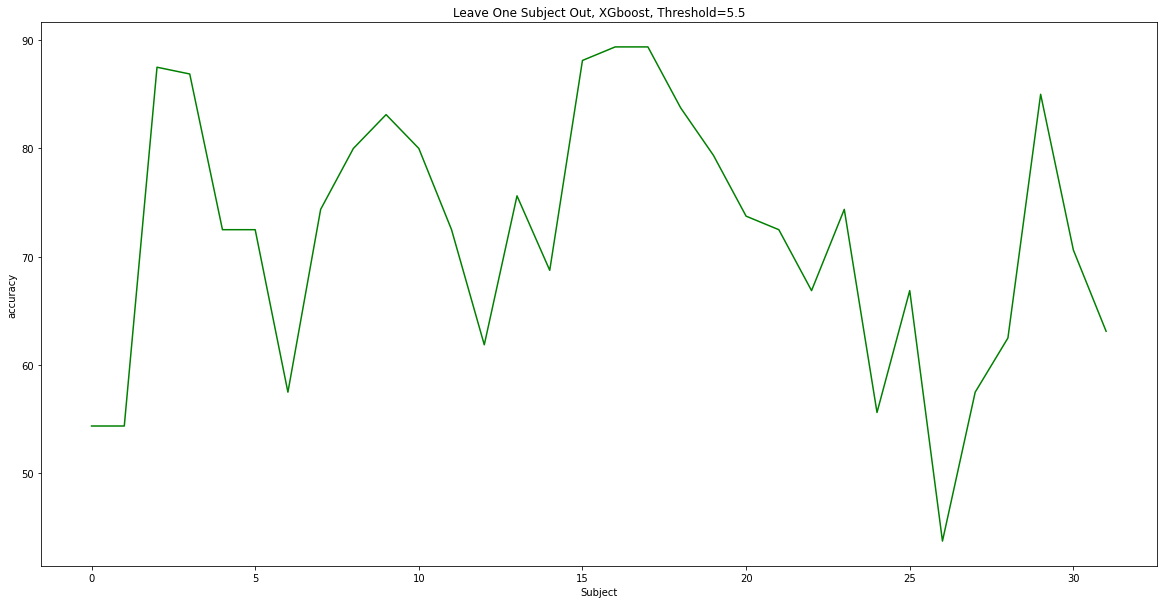

In [103]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(32)], results_final_1, color='g')
plt.xlabel('Subject')
plt.ylabel('accuracy')
plt.title('Leave One Subject Out, XGboost, Threshold=5.5')
plt.show()

In [104]:
sum(results_final_1)/32

72.01171875